In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
SEED = 42

In [50]:
X = pd.read_csv('creditcardfraud_normalised.csv')

In [51]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.564933,0.553154,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.565220,0.537005,0.664877,0.468492,0.592823,0.411176,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [53]:
y =  X['class']
X.drop(['class'], axis=1, inplace = True)

In [54]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.580900,0.564933,0.553154,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.580280,0.565220,0.537005,0.664877,0.468492,0.592823,0.411176,0.416593,0.312585,0.002642
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


In [35]:
pca = PCA(random_state = SEED)
pc = pca.fit_transform(X)

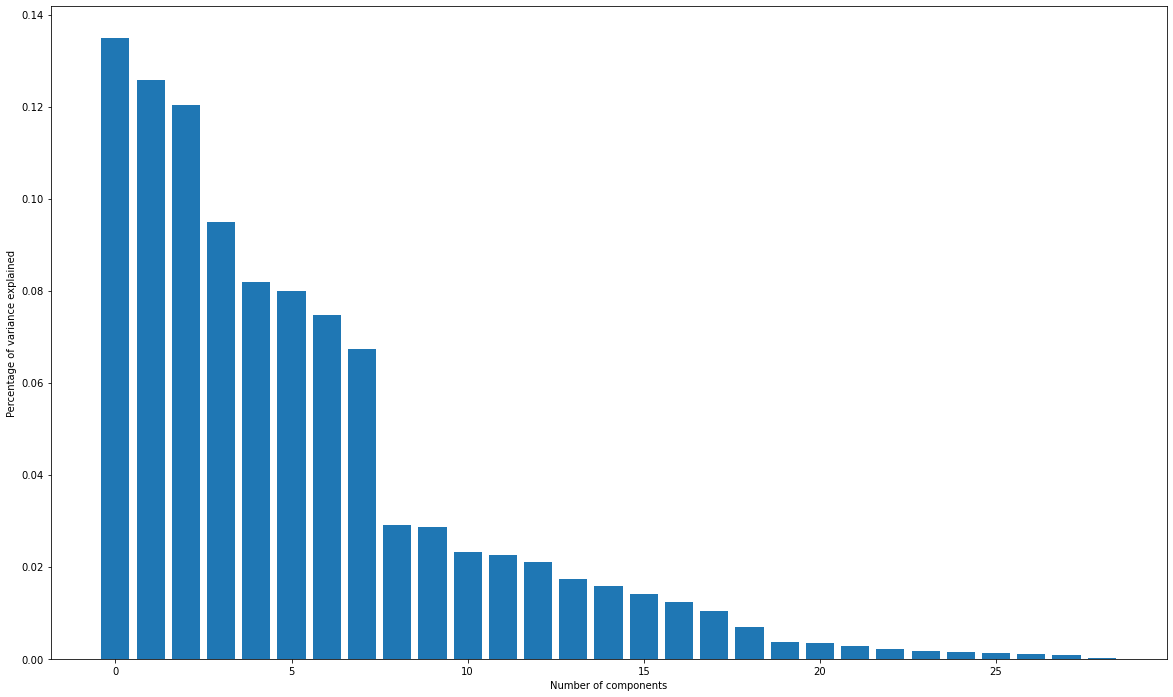

In [40]:
# Distribution of variance plot
n = X.shape[1]
x_axis = np.arange(n)
var_per = pca.explained_variance_ratio_
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot()
ax.set_xlabel('Number of components')
ax.set_ylabel('Percentage of variance explained')
plt.bar(x_axis, var_per)
plt.show()

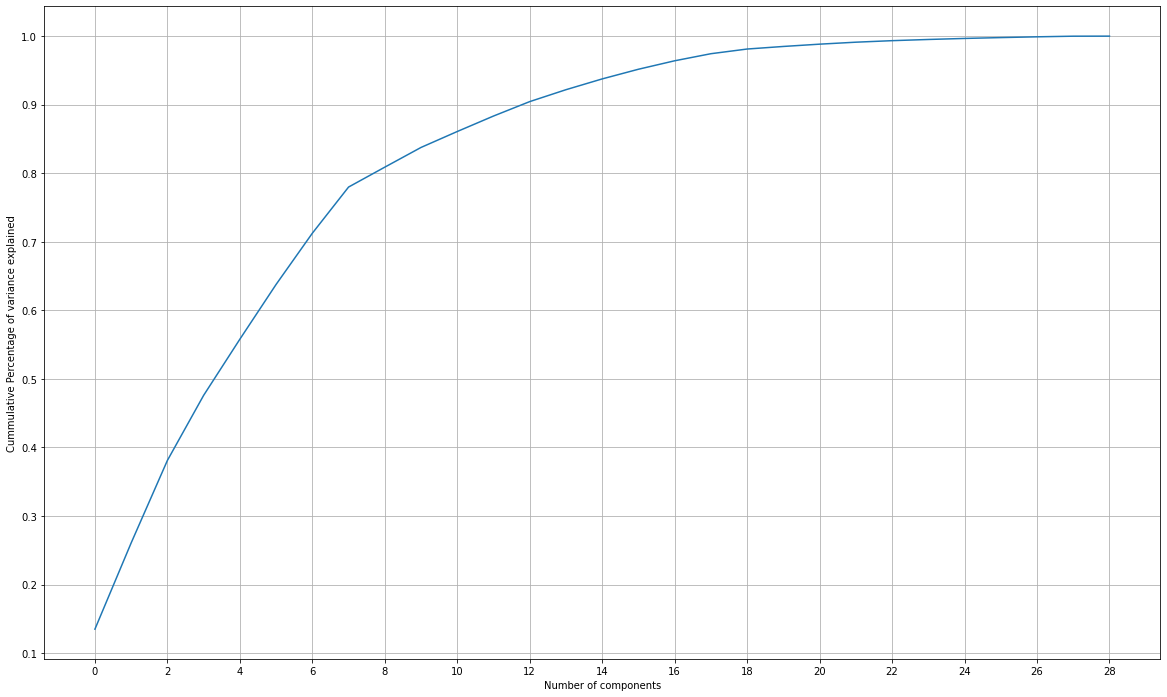

In [41]:
# sorted list of cummulative sums of explained variance
cumm_var = pca.explained_variance_ratio_.cumsum()
# plot to visualize the cummulative percentage of variance explained over the number of components
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot()
ax.set_xlabel('Number of components')
ax.set_ylabel('Cummulative Percentage of variance explained')
ax.set_xticks(np.arange(0, 45, 2))
ax.set_yticks(np.arange(0,1.1, 0.1))
ax.grid()
plt.plot(cumm_var)
plt.show()

In [43]:
def pca_df(data, var_per):
    """
    Inputs:  data - data frame 
             var_per - float in [0,1]
    Returns: pca class of data
             data frame with PC that explain var_per% of the variance of data
    """
    #instantiate PCA 
    pca = PCA(random_state=SEED)
    data_pca = pca.fit_transform(data)
    cumm_var = pca.explained_variance_ratio_.cumsum()
    #number of columns that explain var_per% of variance
    n = np.argmax(cumm_var >= var_per)
    #names of columns in output dataframe
    col_names = ['PC' + str(k) for k in range(1, data_pca.shape[1]+1)]
    #drop cols not necessary to explain % of variance desired
    data_PC = pd.DataFrame(data_pca, columns = col_names).iloc[:,:(n-1)]
    
    return pca, data_PC

In [47]:
X_pca,X_pc = pca_df(X,.8)

In [48]:
X_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.009021,-0.030892,-0.076738,0.109754,-0.031201,0.061295,-0.032802
1,-0.045796,0.020565,0.037857,0.047513,0.011453,0.019738,0.095902
2,-0.092871,-0.022728,0.055534,0.175360,0.176821,0.016072,0.037136
3,-0.158406,-0.036253,0.039307,-0.047206,0.096097,-0.038692,-0.013468
4,0.019035,0.082049,0.104177,0.013093,-0.062662,0.018176,-0.048931
...,...,...,...,...,...,...,...
284802,-0.068636,0.040844,-0.053354,-0.069108,0.052860,-0.091857,-0.094735
284803,-0.136937,-0.064564,0.094029,0.087087,0.120471,-0.033475,-0.008931
284804,0.086257,-0.014272,-0.014221,0.099373,0.044946,-0.024967,0.024477
284805,0.016598,0.089300,-0.080668,0.146720,-0.226128,0.031793,-0.114997
